# Coursera Capstone Project
## The Battle of Neighborhoods - Final Report (Week 2)

In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

## 1. Introduction Section :
### Introduction & Business Problem :
#### Problem Background:

The City of New York, is the most populous city in the United States. It is diverse and is the financial capital of USA. It is multicultural. It provides lot of business oppourtunities and business friendly environment. It has attracted many different players into the market. It is a global hub of business and commerce. The city is a major center for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the United States. This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analysed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

#### Problem Description:

A restaurant is a business which prepares and serves food and drink to customers in return for money, either paid before the meal, after the meal, or with an open account. The City of New York is famous for its excelllent cuisine. It's food culture includes an array of international cuisines influenced by the city's immigrant history.

<ol>
<li>Central and Eastern European immigrants, especially Jewish immigrants - bagels, cheesecake, hot dogs, knishes, and delicatessens
<li>Italian immigrants - New York-style pizza and Italian cuisine
<li>Jewish immigrants and Irish immigrants - pastrami and corned beef
<li>Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city
<li>Mobile food vendors - Some 4,000 licensed by the city
<li>Middle Eastern foods such as falafel and kebabs examples of modern New York street food
<li>It is famous for not just Pizzerias, Cafe's but also for fine dining Michelin starred restaurants.The city is home to "nearly one thousand of the finest and most diverse haute cuisine restaurants in the world", according to Michelin.
</ol>

So it is evident that to survive in such competitive market it is very important to startegically plan. Various factors need to be studied inorder to decide on the Location such as :

<ol>
<li>New York Population
<li>New York City Demographics
<li>Are there any Farmers Markets, Wholesale markets etc nearby so that the ingredients can be purchased fresh to maintain quality and cost?
<li>Are there any venues like Gyms, Entertainmnet zones, Parks etc nearby where floating population is high etc
<li>Who are the competitors in that location?
<li>Cuisine served / Menu of the competitors
<li>Segmentation of the Borough
<li>Untapped markets
<li>Saturated markets etc
    </ol>

Eventhough well funded XYZ Company Ltd. need to choose the correct location to start its first venture.If this is successful they can replicate the same in other locations. First move is very important, thereby choice of location is very important.

### Target Audience
To recommend the correct location, XYZ Company Ltd has appointed me to lead of the Data Science team. The objective is to locate and recommend to the management which neighborhood of Newyork city will be best choice to start a restaurant. The Management also expects to understand the rationale of the recommendations made.

This would interest anyone who wants to start a new restaurant in Newyork city.

### Success Criteria:
The success criteria of the project will be a good recommendation of borough/Neighborhood choice to XYZ Company Ltd based on Lack of such restaurants in that location and nearest suppliers of ingredients.

## Data Section:
### Description of the data and its sources that will be used to solve the problem

The following data is required to answer the issues of the problem:
<ul>
<li>List of Boroughs and neighborhoods of Manhattan with their geodata (latitud and longitud)
<li>List of Subway metro stations in Manhattan with their address location
<li>List of apartments for rent in Manhattan area with their addresses and price
<li>Preferably, a list of apartment for rent with additional information, such as price, address, area, # of beds, etc
<li>Venues for each Manhattan neighborhood ( than can be clustered)
<li>Venues for subway metro stations, as needed
    </ul>

## Methodology section:
This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

### The analysis and the stragegy:
The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Singapore. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these DATA will allow to answer the key questions to make a decision:
<ul>
<li>What is the cost of rent (per square ft) around a mile radius from each subway metro station?
<li>What is the area of Manhattan with best rental pricing that meets criteria established?
<li>What is the distance from work place ( Park Ave and 53 rd St) and the tentative future home?
<li>What are the venues of the two best places to live? How the prices compare?
<li>How venues distribute among Manhattan neighborhoods and around metro stations?
<li>Are there tradeoffs between size and price and location?
<li>Any other interesting statistical data findings of the real estate and overall data.
    </ul>

### How the data will be used to solve the problem
The data will be used as follows:
<ul>
<li>Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB)
<li>Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately
<li>Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations.
create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics.
<li>Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim.
<li>Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.</ul>

### METHODOLOY EXECUTION - Mapping Data


In [3]:
address = 'Mccallum Street, Singapore'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


The geograpical coordinate of Singapore home are 1.2784801, 103.8493717.


In [4]:
neighborhood_latitude=1.2792655
neighborhood_longitude=103.8480938

In [5]:
CLIENT_ID = 'AN3Pxxx' # your Foursquare ID
CLIENT_SECRET = 'YF0B1xxx' # your Foursquare Secret
VERSION = '20180604'

In [6]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=AN3P2JKU5EKBAEVBS2IMA4A21US0GMUZ3NQDQZDVRIAGRGRR&client_secret=YF0B1B12AOM0ACMXOHU1TFFTZM5RXNDFF4GBAHDB35EX514Z&v=20180604&ll=1.2792655,103.8480938&radius=500&limit=100'

In [7]:
results = requests.get(url).json()

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(100, 4)

In [10]:
SGnearby_venues.head(10)


,name,categories,lat,lng
0,Napoleon Food & Wine Bar,Wine Bar,1.279925,103.847333
1,Pepper Bowl,Asian Restaurant,1.279371,103.846710
2,Native,Cocktail Bar,1.280135,103.846844
3,Park Bench Deli,Deli / Bodega,1.279872,103.847287
4,Mellower Coffee,Café,1.277814,103.848188
5,Muchachos,Burrito Place,1.279072,103.847026
6,Dumpling Darlings,Dumpling Restaurant,1.280483,103.846942
7,Sofitel So Singapore,Hotel,1.280017,103.849813
8,PS.Cafe,Café,1.280468,103.846264
9,ShuKuu Izakaya,Japanese Restaurant,1.280111,103.847762


In [11]:

latitude=1.2792655
longitude=103.8480938
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

In [18]:
manhattan_data  = pd.read_csv('mh_neigh_data.csv') 
manhattan_data.head()

FileNotFoundError: [Errno 2] File b'mh_neigh_data.csv' does not exist: b'mh_neigh_data.csv'

In [20]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-86aca22f-8fa8-468a-bec2-928bd5b078d4',
    'IBM_API_KEY_ID': 'aeTgIQag53JvvgF3TcmwQACx19Sk8TUFqTo-tq2Is2oO',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-0lgby7c5bnpkm4',
    'FILE': 'mh_neigh_data.csv'
}
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e7641aadb68744b1af88c0341ebb926c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aeTgIQag53JvvgF3TcmwQACx19Sk8TUFqTo-tq2Is2oO',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e7641aadb68744b1af88c0341ebb926c.get_object(Bucket='capstoneproject-donotdelete-pr-0lgby7c5bnpkm4',Key='mh_neigh_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
manhattan_data = pd.read_csv(body)
manhattan_data.head()

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [21]:
manhattan_data.tail()


,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels
35,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,Manhattan,Tudor City,40.746917,-73.971219,3
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,Manhattan,Flatiron,40.739673,-73.990947,3
39,Manhattan,Hudson Yards,40.756658,-74.000111,2


In [23]:


# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-86aca22f-8fa8-468a-bec2-928bd5b078d4',
    'IBM_API_KEY_ID': 'aeTgIQag53JvvgF3TcmwQACx19Sk8TUFqTo-tq2Is2oO',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-0lgby7c5bnpkm4',
    'FILE': 'manhattan_merged - Sheet1.csv'
}
body = client_e7641aadb68744b1af88c0341ebb926c.get_object(Bucket='capstoneproject-donotdelete-pr-0lgby7c5bnpkm4',Key='manhattan_merged - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
manhattan_merged = pd.read_csv(body)
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


In [25]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters


In [26]:
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


### Map of Manhattan places for rent
#### Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.

In [27]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-86aca22f-8fa8-468a-bec2-928bd5b078d4',
    'IBM_API_KEY_ID': 'aeTgIQag53JvvgF3TcmwQACx19Sk8TUFqTo-tq2Is2oO',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-0lgby7c5bnpkm4',
    'FILE': 'MH_flats_price.csv'
}
body = client_e7641aadb68744b1af88c0341ebb926c.get_object(Bucket='capstoneproject-donotdelete-pr-0lgby7c5bnpkm4',Key='MH_flats_price.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
mh_rent = pd.read_csv(body)
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,NaN,NaN


In [28]:
mh_rent.tail()


,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2,1500,10000,NaN,NaN


### Obtain geodata ( lat,long) for each rental place in Manhattan with Nominatim
Data was stored in a csv file for simplifaction report purposes and saving code processing time in future.

In [34]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_4 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-86aca22f-8fa8-468a-bec2-928bd5b078d4',
    'IBM_API_KEY_ID': 'aeTgIQag53JvvgF3TcmwQACx19Sk8TUFqTo-tq2Is2oO',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-0lgby7c5bnpkm4',
    'FILE': 'MH_rent_latlong.csv'
}
body = client_e7641aadb68744b1af88c0341ebb926c.get_object(Bucket='capstoneproject-donotdelete-pr-0lgby7c5bnpkm4',Key='MH_rent_latlong.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
mh_rent = pd.read_csv(body)
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,40.744118,-73.995299


In [35]:
mh_rent.tail()


,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3,1700,8750,40.769465,-73.960339
140,50 Murray Street,No fee rental in Tribeca,7.11,2,1223,8700,40.714051,-74.009608
141,300 East 56th Street,No fee rental in Midtown East,3.87,3,2100,8118,40.758216,-73.965190
142,1930 Broadway,No fee rental in Central Park West,5.06,2,1600,8095,40.772474,-73.981901
143,33 West 9th Street,Rental in Greenwich Village,6.67,2,1500,10000,40.733691,-73.997323


### Manhattan apartment rent price statistics

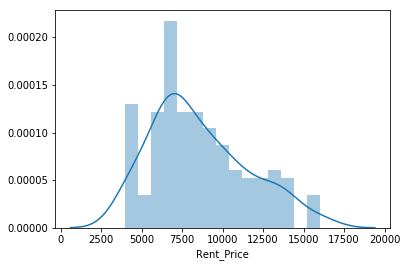

In [36]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

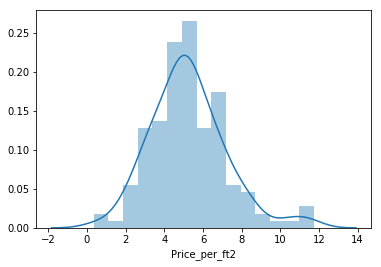

In [37]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

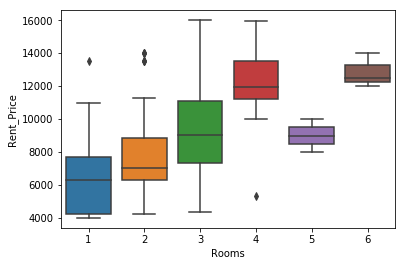

In [38]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)


## Map of Manhattan apartments for rent

In [39]:
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

## Map of Manhattan showing the places for rent and the cluster of venues
### Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.

In [40]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

#### In the map above, examination of appartments with rental place below 7000/month is straightforwad while knowing the venues around it.
#### We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.

In [41]:
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


### Mapping Manhattan Subway locations
Manhattan subway metro locations ( address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit. For simplification, a csv file was produced from the 'numbers' (Apple excel ) so that the reading of this file is the starting point here.